In [ ]:
import os
import mysql.connector
from PIL import Image

# Подключение к БД
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dorogusha1",
    database="JupiterDB"
)
cursor = conn.cursor()

# Пути к изображениям
photos = [
    r"C:\Users\alexa\Videos\ITLab\photo_2024-12-02_08-39-13.jpg",
    r"C:\Users\alexa\Videos\ITLab\photo_2024-12-02_08-44-41 (2).jpg",
    r"C:\Users\alexa\Videos\ITLab\photo_2024-12-02_08-44-41.jpg"
]

compressed_dir = r"C:\Users\alexa\Videos\ITLab\compressed"
os.makedirs(compressed_dir, exist_ok=True)

for photo_path in photos:
    original_size = os.path.getsize(photo_path)

    # Сжатие изображения
    img = Image.open(photo_path)
    compressed_path = os.path.join(compressed_dir, os.path.basename(photo_path))
    img.save(compressed_path, "JPEG", quality=50)  # 50% качество

    compressed_size = os.path.getsize(compressed_path)

    # Загрузка данных в БД
    cursor.execute("""
        INSERT INTO Photos (original_path, compressed_path, original_size, compressed_size)
        VALUES (%s, %s, %s, %s)
    """, (photo_path, compressed_path, original_size, compressed_size))

conn.commit()
cursor.close()
conn.close()

print("Фотографии обработаны и загружены в БД.")


In [ ]:
import os

photo_path = photo_path = "C:\\Users\\alexa\\Videos\\ITLab\\photo_2024-12-02_08-44-41.jpg"
 # Укажи путь к файлу

# Проверяем, существует ли файл
if os.path.exists(photo_path):
    original_size = os.path.getsize(photo_path)  # Получаем размер файла в байтах
    print(f"Размер файла: {original_size} байт(а)")  # Печатаем размер
else:
    print("Файл не найден")


In [ ]:
#Наработка PyQt6
from PyQt6 import QtWidgets, QtGui, QtCore
import mysql.connector
import os

class DatabaseViewer(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("База данных Фото")
        self.setGeometry(100, 100, 800, 500)
        self.setStyleSheet("background-color: #1a001a; color: #33ff33;")
        
        self.layout = QtWidgets.QVBoxLayout()
        self.table = QtWidgets.QTableWidget()
        self.layout.addWidget(self.table)
        self.setLayout(self.layout)
        
        self.load_data()
    
    def load_data(self):
        try:
            conn = mysql.connector.connect(
                host="localhost",
                user="root",
                password="Dorogusha1",
                database="JupiterDB"
            )
            cursor = conn.cursor()
            cursor.execute("SELECT id, original_path, compressed_path, original_size, compressed_size FROM Photos")
            
            rows = cursor.fetchall()
            conn.close()
            
            self.table.setRowCount(len(rows))
            self.table.setColumnCount(5)
            self.table.setHorizontalHeaderLabels(["ID", "Фото", "Сжатое Фото", "Размер", "Сжатый размер", "Разрешение"])
            self.table.setStyleSheet("QTableWidget {font-size: 14px; color: #33ff33; background-color: #330066;}")
            
            for row_idx, row_data in enumerate(rows):
                for col_idx, col_data in enumerate(row_data):
                    item = QtWidgets.QTableWidgetItem(str(col_data))
                    item.setTextAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)
                    if col_idx == 0:
                        item.setForeground(QtGui.QBrush(QtGui.QColor("#ff00ff")))  # ID - ярко-фиолетовый
                    self.table.setItem(row_idx, col_idx, item)
                    
                self.table.item(row_idx, 0).setFlags(QtCore.Qt.ItemFlag.ItemIsEnabled)
                self.table.item(row_idx, 0).setForeground(QtGui.QBrush(QtGui.QColor("#ff00ff")))
                self.table.item(row_idx, 0).setFont(QtGui.QFont("Arial", 12, QtGui.QFont.Weight.Bold))
            
            self.table.cellClicked.connect(self.show_image)
        except mysql.connector.Error as err:
            print(f"Ошибка подключения к БД: {err}")
    
    def show_image(self, row, col):
        if col == 0:
            image_path = self.table.item(row, 1).text()
            if os.path.exists(image_path):
                self.display_image(image_path)
    
    def display_image(self, path):
        image_viewer = QtWidgets.QLabel()
        pixmap = QtGui.QPixmap(path)
        image_viewer.setPixmap(pixmap)
        image_viewer.setScaledContents(True)
        image_viewer.setWindowTitle("Просмотр изображения")
        image_viewer.resize(600, 400)
        image_viewer.setStyleSheet("background-color: #000; border: 2px solid #ff00ff;")
        image_viewer.show()
        self.image_viewer = image_viewer

if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    viewer = DatabaseViewer()
    viewer.show()
    sys.exit(app.exec())


In [ ]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Dorogusha1",
        database="JupiterDB"
    )
    print("✅ Успешное подключение к БД")
    conn.close()
except Exception as e:
    print("❌ Ошибка подключения:", e)


In [ ]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dorogusha1",
    database="JupiterDB"
)
cursor = conn.cursor()
cursor.execute("SELECT * FROM Photos LIMIT 5")
rows = cursor.fetchall()
conn.close()
print(rows)


In [ ]:
import os

photo_path = r"C:\Users\alexa\Videos\ITLab\photo_2024-12-02_08-39-13.jpg"

if os.path.exists(photo_path):
    print("✅ Файл найден")
else:
    print("❌ Файл не найден, проверь путь")



In [ ]:
from PIL import Image

try:
    img = Image.open(photo_path)
    img.show()
    img.save("test_compressed.jpg", "JPEG", quality=50)
    print("✅ Изображение успешно сжато")
except Exception as e:
    print("❌ Ошибка при обработке изображения:", e)


,ID,Фото,Сжатое Фото,Размер,Сжатый размер
0,241202004,C:\Users\alexa\Videos\ITLab\photo_2024-12-02_0...,C:\Users\alexa\Videos\ITLab\compressed\photo_2...,60319,56835
1,241202005,C:\Users\alexa\Videos\ITLab\photo_2024-12-02_0...,C:\Users\alexa\Videos\ITLab\compressed\photo_2...,89503,81372
2,241202006,C:\Users\alexa\Videos\ITLab\photo_2024-12-02_0...,C:\Users\alexa\Videos\ITLab\compressed\photo_2...,31953,30592


Изображение для ID 241202004:


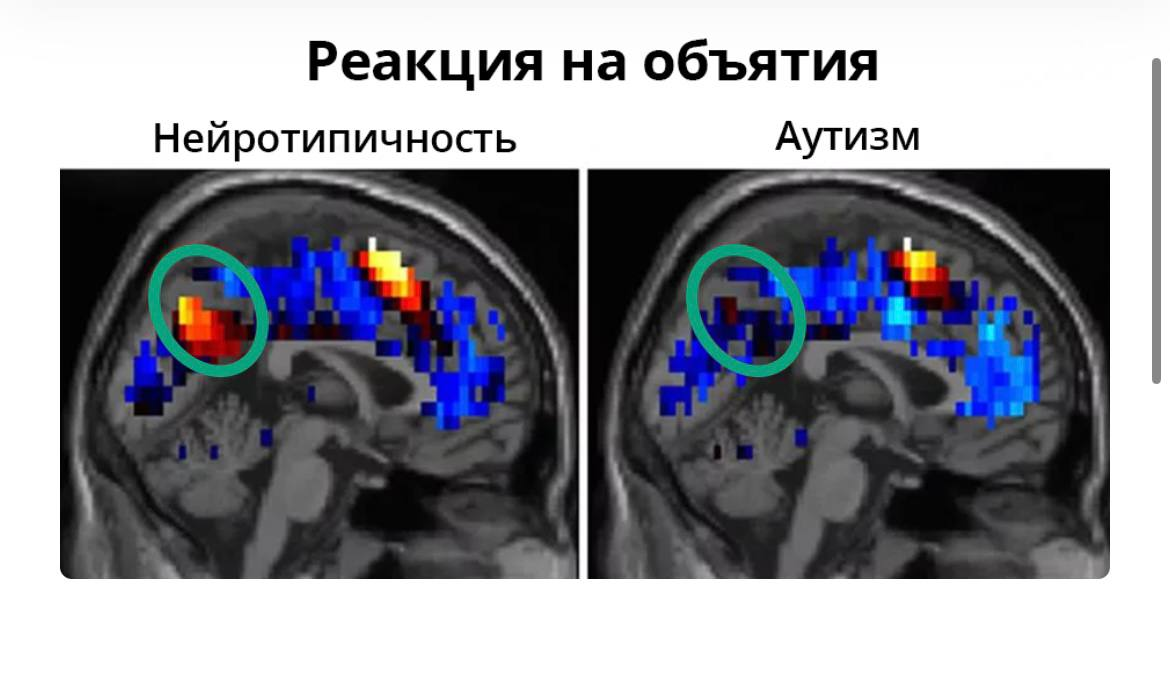

Изображение для ID 241202005:


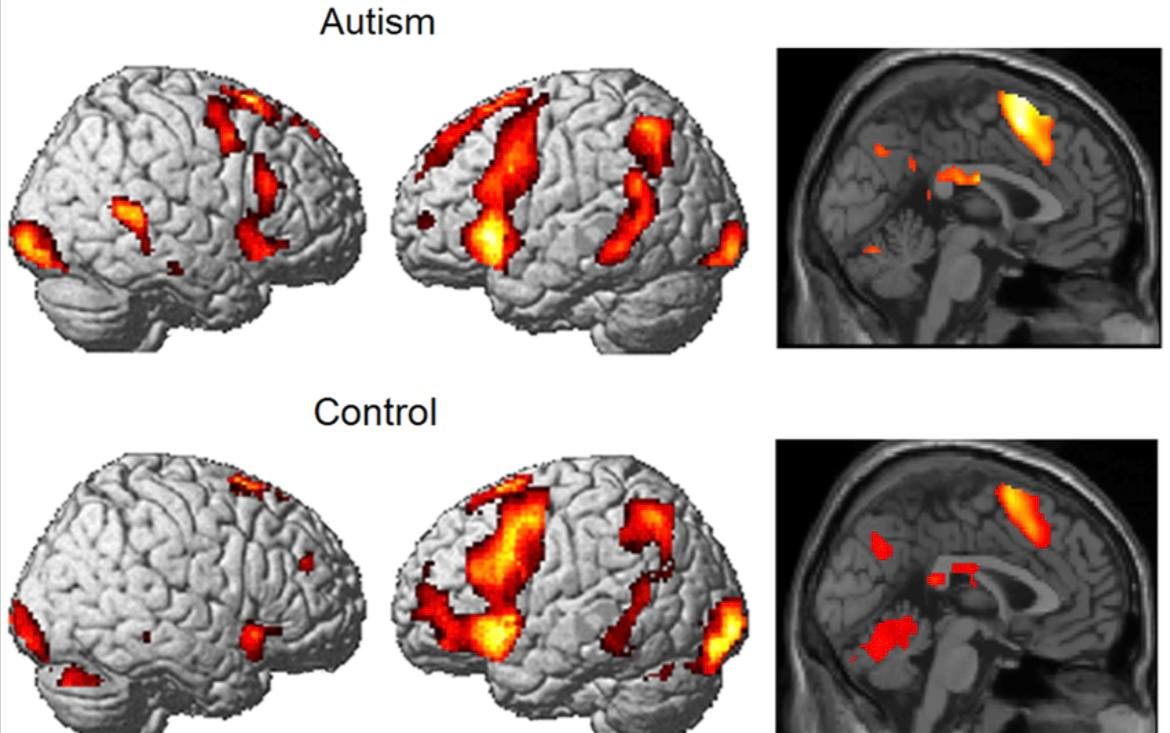

Изображение для ID 241202006:


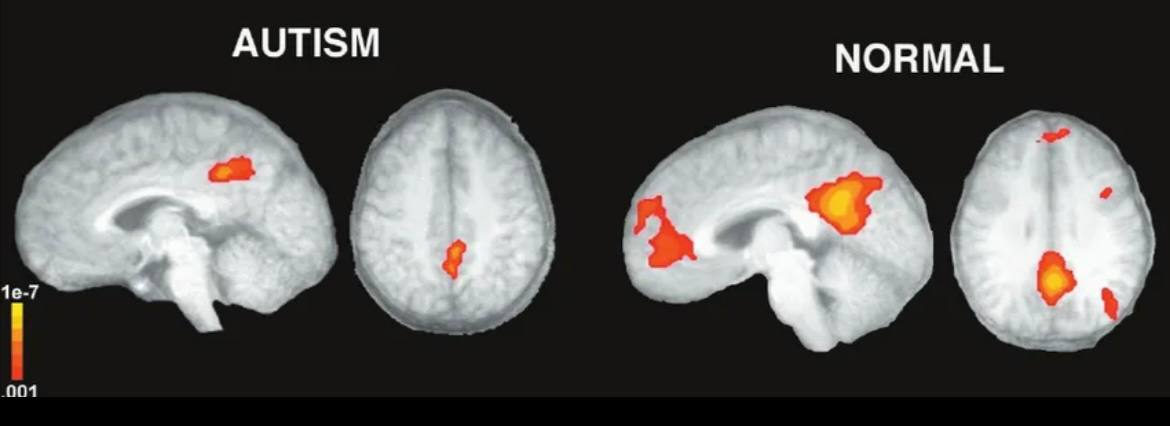

In [7]:
import mysql.connector
import pandas as pd
import os
from IPython.display import display, Image

class DatabaseViewer:
    def __init__(self):
        self.connection = None
        self.load_data()

    def load_data(self):
        try:
            # Соединение с базой данных
            conn = mysql.connector.connect(
                host="localhost",
                user="root",
                password="Dorogusha1",
                database="JupiterDB"
            )
            cursor = conn.cursor()
            cursor.execute("SELECT id, original_path, compressed_path, original_size, compressed_size FROM Photos")
            
            # Загрузка данных в pandas DataFrame
            rows = cursor.fetchall()
            columns = ["ID", "Фото", "Сжатое Фото", "Размер", "Сжатый размер"]
            df = pd.DataFrame(rows, columns=columns)
            conn.close()

            # Отображение таблицы в Jupyter
            display(df)
            
            # Для отображения изображения при клике на ID
            self.display_image_on_id_click(df)
            
        except mysql.connector.Error as err:
            print(f"Ошибка подключения к БД: {err}")

    def display_image_on_id_click(self, df):
        # Предположим, что при клике на первую колонку выводится изображение из оригинального пути
        for index, row in df.iterrows():
            image_path = row['Фото']
            if os.path.exists(image_path):
                print(f"Изображение для ID {row['ID']}:")
                display(Image(filename=image_path))
            else:
                print(f"Файл изображения для ID {row['ID']} не найден.")

if __name__ == "__main__":
    viewer = DatabaseViewer()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import mysql.connector
import os
from PIL import Image, ImageTk

class DatabaseViewer:
    def __init__(self, root):
        self.root = root
        self.root.title("База данных Фото")
        self.root.geometry("900x600")
        self.root.configure(bg="#00aaff")
        
        style = ttk.Style()
        style.configure("Treeview", font=("Arial", 14, "bold"), foreground="#001a66", background="#ffffff", borderwidth=2, relief="solid")
        style.configure("Treeview.Heading", font=("Arial", 14, "bold"), foreground="#001a66")
        
        self.frame = tk.Frame(root, bg="#00aaff")
        self.frame.pack(pady=20, padx=20, fill=tk.BOTH, expand=True)
        
        self.tree = ttk.Treeview(self.frame, columns=("№", "ID", "Фото", "Сжатое Фото", "Размер", "Сжатый размер"), show="headings", height=20)
        self.tree.heading("№", text="№")
        self.tree.heading("ID", text="ID")
        self.tree.heading("Фото", text="Фото")
        self.tree.heading("Сжатое Фото", text="Сжатое Фото")
        self.tree.heading("Размер", text="Размер")
        self.tree.heading("Сжатый размер", text="Сжатый размер")
        
        self.tree.column("№", width=50, anchor="center")
        self.tree.column("ID", width=50, anchor="center")
        self.tree.column("Фото", width=250, anchor="center")
        self.tree.column("Сжатое Фото", width=250, anchor="center")
        self.tree.column("Размер", width=100, anchor="center")
        self.tree.column("Сжатый размер", width=100, anchor="center")
        
        self.tree.pack(fill=tk.BOTH, expand=True)
        
        self.tree.bind("<Double-1>", self.show_image)
        
        self.load_data()
    
    def load_data(self):
        try:
            conn = mysql.connector.connect(
                host="localhost",
                user="root",
                password="Dorogusha1",
                database="JupiterDB"
            )
            cursor = conn.cursor()
            cursor.execute("SELECT id, original_path, compressed_path, original_size, compressed_size FROM Photos")
            rows = cursor.fetchall()
            conn.close()
            
            for i, row in enumerate(rows, start=1):
                self.tree.insert("", tk.END, values=(i, *row))
        except mysql.connector.Error as err:
            messagebox.showerror("Ошибка подключения", f"Ошибка подключения к БД: {err}")
    
    def show_image(self, event):
        item = self.tree.selection()
        if item:
            values = self.tree.item(item, "values")
            image_path = values[2]
            if os.path.exists(image_path):
                self.display_image(image_path)
    
    def display_image(self, path):
        new_window = tk.Toplevel(self.root)
        new_window.title("Просмотр изображения")
        new_window.configure(bg="#000")
        
        img = Image.open(path)
        img = img.resize((800, 500), Image.Resampling.LANCZOS)
        img = ImageTk.PhotoImage(img)
        
        label = tk.Label(new_window, image=img, bg="#000", borderwidth=2, relief="solid")
        label.image = img  # Сохранение ссылки на изображение
        label.pack(padx=10, pady=10)

if __name__ == "__main__":
    root = tk.Tk()
    app = DatabaseViewer(root)
    root.mainloop()
